# Importing Libraries

In [2]:
import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt
import email
import re
from datetime import datetime as dt
# import sns

- emails.csv
- preprocessed_data.csv
- vectorized_folders_df
- vectorized_folders_df_w_label
- preprocessed_data_v2
- NEW_vectorized_folders_df

In [4]:
dataset_directory = "../Datasets/"

# Loading Data

In [10]:
dataset_OG = pd.read_csv(os.path.join(dataset_directory, 'emails.csv'))

data = dataset_OG.copy() ## keeping a safe copy
data.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [11]:
data.shape

(517401, 2)

# Extracting Features 

This functions we're taken from Dondald's E-mail categorization notebook in Kaggle. You can find it <a href="https://www.kaggle.com/donaldtfung/e-mail-categorization/notebook?fbclid=IwAR3gqVcP7ZUpKlyqVXkaXYK0SOoZqrEfjxpBLT3VXnCzARk_RYiwsBFQIws">here.</a>

### Extracting Headers

In [12]:
def insert_value(dictionary, key, value):
    if key in dictionary:
        values = dictionary.get(key)
        values.append(value)
        dictionary[key] = values
    else:
        dictionary[key] = [value]
    return dictionary

def get_headers(df, header_names):
    headers = {}
    messages = df["message"]
    for message in messages:
        e = email.message_from_string(message)
        for item in header_names:
            header = e.get(item)
            insert_value(dictionary = headers, key = item, value = header) 
    print("Successfully retrieved header information!")
    return headers

In [13]:
header_names = ["Date", "Subject", "X-Folder", "X-From", "X-To"] 
headers = get_headers(data, header_names)

for key in list(headers.keys()):
    data[key] = headers[key]
    
data.head()

Successfully retrieved header information!


,file,message,Date,Subject,X-Folder,X-From,X-To
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Leah Van Arsdall
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Randall L Gay
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Greg Piper


### Extracting Messages

In [14]:
def get_messages(df):
    messages = []
    for item in df["message"]:
        # Return a message object structure from a string
        e = email.message_from_string(item)    
        # get message body  
        message_body = e.get_payload()
        message_body = message_body.lower()
        messages.append(message_body)
    print("Successfully retrieved message body from e-mails!")
    return messages

In [15]:
data["Message-Body"] = get_messages(data)
data.head()

Successfully retrieved message body from e-mails!


,file,message,Date,Subject,X-Folder,X-From,X-To,Message-Body
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,here is our forecast\n\n
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,traveling to have a business meeting takes the...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Leah Van Arsdall,test successful. way to go!!!
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Randall L Gay,"randy,\n\n can you send me a schedule of the s..."
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Greg Piper,let's shoot for tuesday at 11:45.


### Getting Employee Names

In [16]:
def add_name(df, column, labels):
    new_data = {}
    for item in df[column]: 
        tokens = item.split('/')
        for i in range(0, len(labels)):
            value = tokens[i]
            key = labels[i]
            new_data = insert_value(new_data, key, value)        
    for key, value in new_data.items():
        df[key] = pd.Series(value)
    print("Successfully added new column!")
    return df

In [17]:
x_from = pd.DataFrame(data["X-From"], columns = ["X-From"])
if "X-From" not in data.columns:
    data = pd.concat([data, x_from], axis = 1, join = 'inner')

data = add_name(df = data, column = "file", labels = ["employee"])
data.head()

Successfully added new column!


,file,message,Date,Subject,X-Folder,X-From,X-To,Message-Body,employee
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,here is our forecast\n\n,allen-p
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,traveling to have a business meeting takes the...,allen-p
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Leah Van Arsdall,test successful. way to go!!!,allen-p
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Randall L Gay,"randy,\n\n can you send me a schedule of the s...",allen-p
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Greg Piper,let's shoot for tuesday at 11:45.,allen-p


# Further Data Processing

Once we had the data in a tabular for we had to perform further data extraction. This include extracting the data, converting it to datetime, and extraing the message from the `message` feature. 

### Converting Date to Datetime

In [18]:
# return the numerical value of the month
# (e.g. Jan = 1, Feb = 2, ...)
def month_mapping(month_str):
    months = np.array(['Jan', 'Feb', 'Mar', 'Apr',
              'May', 'Jun', 'Jul', 'Aug',
              'Sep', 'Oct', 'Nov', 'Dec'])
    
    return np.where(months == month_str)[0][0] + 1

def extract_date(date_string):
    # should be of the format: DoW, Date, Month (MMM), Year (YYYY), 
    # Time (HH:MM:SS), timezone num, Timezone name
    date_array = re.split(" ", date_string)
    time_array = re.split(":", date_array[4])
    return dt(year = int(date_array[3]),
              month = month_mapping(date_array[2]),
              day = int(date_array[1]),
              hour = int(time_array[0]),
              minute = int(time_array[1]),
              second = int(time_array[2]))

In [19]:
data['Date_datetime'] = data['Date'].apply(extract_date)
data['Day_of_week'] = data['Date'].apply(lambda x: re.split(" ", x)[0][:-1])
data.head()

,file,message,Date,Subject,X-Folder,X-From,X-To,Message-Body,employee,Date_datetime,Day_of_week
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,here is our forecast\n\n,allen-p,2001-05-14 16:39:00,Mon
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,traveling to have a business meeting takes the...,allen-p,2001-05-04 13:51:00,Fri
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Leah Van Arsdall,test successful. way to go!!!,allen-p,2000-10-18 03:00:00,Wed
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Randall L Gay,"randy,\n\n can you send me a schedule of the s...",allen-p,2000-10-23 06:13:00,Mon
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Greg Piper,let's shoot for tuesday at 11:45.,allen-p,2000-08-31 05:07:00,Thu


### X-Folder Contents

In [20]:
def extract_folder_contents(x): 
    return re.split("\\\\", str(x))[-1].lower()

In [21]:
data['X-Folder-split'] = data['X-Folder'].apply(extract_folder_contents)
data.head()

,file,message,Date,Subject,X-Folder,X-From,X-To,Message-Body,employee,Date_datetime,Day_of_week,X-Folder-split
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,here is our forecast\n\n,allen-p,2001-05-14 16:39:00,Mon,'sent mail
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,traveling to have a business meeting takes the...,allen-p,2001-05-04 13:51:00,Fri,'sent mail
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Leah Van Arsdall,test successful. way to go!!!,allen-p,2000-10-18 03:00:00,Wed,'sent mail
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Randall L Gay,"randy,\n\n can you send me a schedule of the s...",allen-p,2000-10-23 06:13:00,Mon,'sent mail
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Greg Piper,let's shoot for tuesday at 11:45.,allen-p,2000-08-31 05:07:00,Thu,'sent mail


In [22]:
#Add column with message length
data['message_length']  = data['Message-Body'].str.len()

#drop columns that are not needed anymore
columns_to_drop = ['file', 'X-From', 'X-Folder', 'X-To', 'employee']
data = data.drop(columns_to_drop, axis=1)

# Remaining columns to focus on
data.columns

# shows one entire message with all fields
print(data['message'][1])

Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>
Date: Fri, 4 May 2001 13:51:00 -0700 (PDT)
From: phillip.allen@enron.com
To: john.lavorato@enron.com
Subject: Re:
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.

As far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the

In [23]:
data['contains-cc'] = data.message.str.contains(r'X-cc: .+').astype(int)

data['contains-bcc'] = data.message.str.contains(r'X-bcc: .+').astype(int)

data.head()

,message,Date,Subject,Message-Body,Date_datetime,Day_of_week,X-Folder-split,message_length,contains-cc,contains-bcc
0,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,here is our forecast\n\n,2001-05-14 16:39:00,Mon,'sent mail,23,0,0
1,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,traveling to have a business meeting takes the...,2001-05-04 13:51:00,Fri,'sent mail,786,0,0
2,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,test successful. way to go!!!,2000-10-18 03:00:00,Wed,'sent mail,30,0,0
3,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",,"randy,\n\n can you send me a schedule of the s...",2000-10-23 06:13:00,Mon,'sent mail,187,0,0
4,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Re: Hello,let's shoot for tuesday at 11:45.,2000-08-31 05:07:00,Thu,'sent mail,35,0,0


In [9]:
# data.to_csv(os.path.join(dataset_directory, "preprocessed_data.csv"), index=False)

## Creating Embedding

In [19]:
data = pd.read_csv(os.path.join(dataset_directory, "preprocessed_data.csv"))

In [6]:
import gensim
from gensim.models import KeyedVectors, Word2Vec
import nltk

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pedro\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pedro\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [20]:
data2 = data.copy()

In [8]:
# !wget -nd https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz 
model = KeyedVectors.load_word2vec_format('../Models/GoogleNews-vectors-negative300.bin.gz', binary=True)
# Words are encoded into length 300 vector

In [21]:
# RUN THIS CELL IF DO NOT HAVE EMBEDDINGS YET
# RUN THE CELL BELOW IF ALREADY DO

def remove_unnecessary_words(s):
    """
    Remove certain words that are irrelevant
    e.g. the NLTK stopwords, 'items', 'inbox'
    """
    tokenized_s = word_tokenize(s)
    add_to_stopwords = ['items', 'item', 'mails', 'mail', 
                      'inboxes', 'inbox', 'threads', 'thread']
    to_remove = stopwords.words('english') + add_to_stopwords
    new_sent = [c for c in tokenized_s if not c in to_remove]
    return ' '.join(new_sent)

def remove_punctuation(s):
    return ''.join([s[i] for i in np.arange(len(s)) if not s[i] in string.punctuation])


#    Find vector representation of every folder
#    If folder has multiple words after cleaning,
#    then just average the vectors

def vector_rep(word):
    if word in model.wv.vocab:
        return model.wv[word]
    return np.zeros(shape=(1, 300))

def general_vector_rep(phrase):
    tokenized = word_tokenize(phrase)
    if (len(tokenized) == 0):
        return np.zeros(shape=(1, 300))
    if (len(tokenized) == 1):
        return vector_rep(tokenized[0])
    vectors = np.zeros(shape = (len(tokenized), 300))
    for i, word in enumerate(tokenized):
        vectors[i] = vector_rep(word).reshape((1, 300))
    return np.average(vectors, axis=0)

def make_vector_rep_df(labels):
    d = dict.fromkeys(labels)
    for key in list(d.keys()):
        d[key] = general_vector_rep(key)
    df = pd.DataFrame.from_dict(d, orient='index')
    del d
    for i in np.arange(len(df)):
        if(pd.isnull(df.iloc[i, 1])):
            df.iloc[i, :] = pd.Series(np.zeros(300))
    return df

In [22]:
data2['X-Folder-split_cleaned'] = data2['X-Folder-split'].apply(remove_unnecessary_words)
data2['X-Folder-split_cleaned'] = data2['X-Folder-split_cleaned'].apply(remove_punctuation)
data2.head()

C:\Users\Pedro\Anaconda3\envs\data_mining_gpu\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
C:\Users\Pedro\Anaconda3\envs\data_mining_gpu\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


In [33]:
# data2.to_csv(os.path.join(dataset_directory, "preprocessed_data_v2.csv"), index=False)

In [23]:
vectorized_folders_df = make_vector_rep_df(list(data2['X-Folder-split_cleaned'].unique()))
vectorized_folders_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
sent,-0.0170898,0.021729,0.225586,-0.129883,-0.199219,-0.107910,-0.184570,-0.083984,0.004974,0.111328,...,-0.148438,-0.283203,-0.051758,0.112305,0.267578,0.059082,0.144531,-0.091309,-0.069824,-0.021606
documents,0.0976562,0.063965,0.024658,-0.151367,-0.032471,0.110352,0.044678,0.195312,0.089844,-0.285156,...,0.099121,-0.245117,-0.113770,0.026367,-0.156250,0.119141,0.073730,-0.292969,-0.035889,0.032959
contacts,0.0742188,0.001274,0.065918,-0.086914,-0.070801,0.249023,-0.320312,-0.174805,0.091797,-0.052734,...,0.022583,0.097656,0.023071,-0.063965,0.114258,0.015869,0.416016,-0.140625,-0.050537,-0.033447
deleted,-0.172852,-0.047852,0.316406,0.145508,-0.220703,0.009521,-0.028076,0.216797,0.507812,0.092285,...,0.181641,0.076660,0.363281,-0.200195,0.287109,-0.263672,0.196289,-0.361328,-0.050537,-0.070801
discussion,-0.0390625,0.042236,0.014465,0.115234,0.132812,-0.101074,0.164062,-0.100098,0.123535,0.005585,...,-0.011292,-0.175781,0.326172,0.152344,0.042236,-0.011536,-0.125000,-0.229492,-0.112305,-0.158203


In [24]:
vectorized_folders_df.to_csv(os.path.join(dataset_directory, "vectorized_folders_df.csv"))

# Performing Clustering

In [25]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

[-0.47388022 -0.48940984 -0.47170528 -0.58598457  3.12847338  0.2773695
 -0.08098323 -0.52677513 -0.48181311 -0.2952915 ]
[-0.47341678 -0.44348545 -0.48547811 -0.37163591 -0.17621657  0.21203515
 -0.05867861 -0.23623446 -0.40466185  2.43777258]


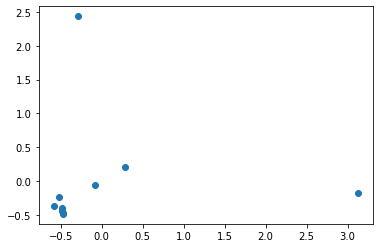

In [26]:
kmeans1 = KMeans(n_clusters = 10)
kmeans1.fit(vectorized_folders_df)
labels1 = kmeans1.predict(vectorized_folders_df)

# HERE WE APPEND THE CLUSTER LABEL
vectorized_folders_df['label'] = labels1

centers1 = kmeans1.cluster_centers_
pca_model1 = PCA(n_components=2)
centers_pca1 = pca_model1.fit_transform(centers1)
centers_pca1_X = centers_pca1.T[0]
centers_pca1_y = centers_pca1.T[1]

print(centers_pca1_X)
print(centers_pca1_y)

plt.scatter(centers_pca1_X, centers_pca1_y)
plt.show()

In [27]:
# Remove the word embedding columns from vectorized_folders_df
vectorized_folders_df = vectorized_folders_df.reset_index().rename(columns = {'index': 'subject'})
# vectorized_folders_df = vectorized_folders_df[['subject', 'label']]

In [28]:
vectorized_folders_df.head()

,subject,0,1,2,3,4,5,6,7,8,...,291,292,293,294,295,296,297,298,299,label
0,sent,-0.0170898,0.021729,0.225586,-0.129883,-0.199219,-0.107910,-0.184570,-0.083984,0.004974,...,-0.283203,-0.051758,0.112305,0.267578,0.059082,0.144531,-0.091309,-0.069824,-0.021606,1
1,documents,0.0976562,0.063965,0.024658,-0.151367,-0.032471,0.110352,0.044678,0.195312,0.089844,...,-0.245117,-0.113770,0.026367,-0.156250,0.119141,0.073730,-0.292969,-0.035889,0.032959,0
2,contacts,0.0742188,0.001274,0.065918,-0.086914,-0.070801,0.249023,-0.320312,-0.174805,0.091797,...,0.097656,0.023071,-0.063965,0.114258,0.015869,0.416016,-0.140625,-0.050537,-0.033447,0
3,deleted,-0.172852,-0.047852,0.316406,0.145508,-0.220703,0.009521,-0.028076,0.216797,0.507812,...,0.076660,0.363281,-0.200195,0.287109,-0.263672,0.196289,-0.361328,-0.050537,-0.070801,0
4,discussion,-0.0390625,0.042236,0.014465,0.115234,0.132812,-0.101074,0.164062,-0.100098,0.123535,...,-0.175781,0.326172,0.152344,0.042236,-0.011536,-0.125000,-0.229492,-0.112305,-0.158203,1


In [29]:
vectorized_folders_df.to_csv(os.path.join(dataset_directory, "vectorized_folders_df_w_label.csv"), index=False)

Unfortunately, many of these items were not placed in the correct label. For this we wen't one by one and fix some of these errors. After much manual feature engineering to modify the labels, a new csv with the name of `NEW_vectorized_folders_df.csv` was created.

In [34]:
data2.head()

,message,Date,Subject,Message-Body,Date_datetime,Day_of_week,X-Folder-split,message_length,contains-cc,contains-bcc,X-Folder-split_cleaned
0,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",NaN,here is our forecast\n\n,2001-05-14 16:39:00,Mon,'sent mail,23,0,0,sent
1,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,traveling to have a business meeting takes the...,2001-05-04 13:51:00,Fri,'sent mail,786,0,0,sent
2,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,test successful. way to go!!!,2000-10-18 03:00:00,Wed,'sent mail,30,0,0,sent
3,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",NaN,"randy,\n\n can you send me a schedule of the s...",2000-10-23 06:13:00,Mon,'sent mail,187,0,0,sent
4,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Re: Hello,let's shoot for tuesday at 11:45.,2000-08-31 05:07:00,Thu,'sent mail,35,0,0,sent


In [35]:
data_testing = pd.read_csv(os.path.join(dataset_directory, "preprocessed_data_v2.csv"))

In [36]:
data_testing.head()

,message,Date,Subject,Message-Body,Date_datetime,Day_of_week,X-Folder-split,message_length,contains-cc,contains-bcc,X-Folder-split_cleaned
0,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",NaN,here is our forecast\n\n,2001-05-14 16:39:00,Mon,'sent mail,23,0,0,sent
1,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,traveling to have a business meeting takes the...,2001-05-04 13:51:00,Fri,'sent mail,786,0,0,sent
2,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,test successful. way to go!!!,2000-10-18 03:00:00,Wed,'sent mail,30,0,0,sent
3,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",NaN,"randy,\n\n can you send me a schedule of the s...",2000-10-23 06:13:00,Mon,'sent mail,187,0,0,sent
4,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Re: Hello,let's shoot for tuesday at 11:45.,2000-08-31 05:07:00,Thu,'sent mail,35,0,0,sent


## Joining Clustering Results with Main DF

In [0]:
NEW_vectorized_folders_df = pd.read_csv(os.path.join()'NEW_vectorized_folders_df.csv')
NEW_vectorized_folders_df = NEW_vectorized_folders_df[['subject', 'label']]

In [0]:
data2 = data2.merge(right = NEW_vectorized_folders_df,
                    how = 'left',
                    left_on = 'X-Folder-split_cleaned',
                    right_on = 'subject')

data = data2.copy()

## Drop Labels 1 and 2

In [0]:
data_filtered = data[(data['label'] != 1) & 
                     (data['label'] != 2)]

The data_filtered is ready to go as our main dataset. Unfortunately, we cannot export to CSV because there aren't any delimiters that work -- the message bodies contain the special characters we'd use as delimiters and so they cause errors in reading back in the exported CSV.

As such, the preprocessing must be run each time the notebook is opened.

## One Hot Encoding and Adding in Embedded Dataset

In [0]:
dfDummies = pd.get_dummies(data_filtered['Day_of_week'], prefix = 'Day= ')
data_filtered = pd.concat([data_filtered, dfDummies], axis=1)
data_filtered = data_filtered.drop(labels='Day_of_week', axis=1)

In [0]:
embedded_df = pd.read_csv('Embedded_Dataset.csv')
embedded_df.head()

,Unnamed: 0,message_length,label,0,1,2,3,4,5,6,...,247,248,249,Day= _Fri,Day= _Mon,Day= _Sat,Day= _Sun,Day= _Thu,Day= _Tue,Day= _Wed
0,0,262,0,0,0,0,0,0,0,0,...,5,13,5,0,0,0,0,0,1,0
1,1,1255,0,0,0,0,0,0,0,0,...,56189,17,76024,0,0,0,0,1,0,0
2,2,1120,0,0,0,0,0,0,0,0,...,374,1365,6669,0,0,0,0,1,0,0
3,3,541,0,0,0,0,0,0,0,0,...,32619,17,26431,0,0,0,0,1,0,0
4,4,1415,0,366,137,1915,47,10180,1061,8563,...,86,1957,76038,1,0,0,0,0,0,0


In [0]:
print(data_filtered.shape)
print(embedded_df.shape)

(71374, 19)
(29141, 260)
